<a href="https://colab.research.google.com/github/chupibk/INT3121-20/blob/master/week1-colab-cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

#just to be sure, reload the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("x_train shape: {}, y_train shape: {}".format(x_train.shape, y_train.shape))
print("{} train samples, {} test samples".format(x_train.shape[0], x_test.shape[0]))

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3), y_train shape: (50000, 1)
50000 train samples, 10000 test samples


In [0]:
#Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [3]:
#build a model
# reference: https://keras.io/examples/cifar10_cnn/
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


W0827 08:44:55.840609 140471924877184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 08:44:56.135732 140471924877184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 08:44:56.143472 140471924877184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 08:44:56.184844 140471924877184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0827 08:44:56.189005 140471924877184 deprecation_wrapp

In [5]:
# train the model
import time
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

start = time.time()
# train the model

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

start = time.time()
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1
)

print("training time: ", time.time() - start)

W0827 08:45:24.796638 140471924877184 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 22s 541us/step - loss: 2.1633 - acc: 0.2020 - val_loss: 2.1406 - val_acc: 0.2197
Epoch 2/20
40000/40000 [==============================] - 15s 381us/step - loss: 2.0225 - acc: 0.2646 - val_loss: 1.9573 - val_acc: 0.2984
Epoch 3/20
40000/40000 [==============================] - 15s 379us/step - loss: 1.9622 - acc: 0.2898 - val_loss: 1.9531 - val_acc: 0.2934
Epoch 4/20
40000/40000 [==============================] - 15s 380us/step - loss: 1.9129 - acc: 0.3133 - val_loss: 1.8535 - val_acc: 0.3350
Epoch 5/20
40000/40000 [==============================] - 15s 383us/step - loss: 1.8557 - acc: 0.3329 - val_loss: 1.7833 - val_acc: 0.3615
Epoch 6/20
40000/40000 [==============================] - 15s 382us/step - loss: 1.7938 - acc: 0.3579 - val_loss: 1.7298 - val_acc: 0.3806
Epoch 7/20
40000/40000 [==============================] - 15s 380us/step - loss: 1.7393 - acc: 0.3765 - val_loss: 1.

In [6]:
start = time.time()
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1
)

print("training time: ", time.time() - start)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 16s 395us/step - loss: 1.3676 - acc: 0.5139 - val_loss: 1.3141 - val_acc: 0.5362
Epoch 2/100
40000/40000 [==============================] - 16s 391us/step - loss: 1.3526 - acc: 0.5196 - val_loss: 1.3156 - val_acc: 0.5344
Epoch 3/100
40000/40000 [==============================] - 16s 392us/step - loss: 1.3433 - acc: 0.5220 - val_loss: 1.2843 - val_acc: 0.5468
Epoch 4/100
40000/40000 [==============================] - 16s 391us/step - loss: 1.3275 - acc: 0.5300 - val_loss: 1.3047 - val_acc: 0.5424
Epoch 5/100
40000/40000 [==============================] - 16s 392us/step - loss: 1.3154 - acc: 0.5328 - val_loss: 1.2587 - val_acc: 0.5582
Epoch 6/100
40000/40000 [==============================] - 16s 389us/step - loss: 1.3077 - acc: 0.5342 - val_loss: 1.2818 - val_acc: 0.5462
Epoch 7/100
40000/40000 [==============================] - 16s 390us/step - loss: 1.2940 - acc: 0.5425 - val_l

In [0]:
# plot the history training
def plot_train_val(history, value="loss"):
    """Print loss or accuracy
    "loss" or "acc"
    """
    train_value = history.history[value]
    val_value = history.history["val_"+value]

    epochs = range(1, len(train_value) + 1)
    # "bo" is for "blue dot"
    plt.plot(epochs, train_value, 'r+', label='Training %s' % value)
    # b is for "solid blue line"
    plt.plot(epochs, val_value, 'b', label='Validation %s' % value)
    plt.title('Training and validation %s' % value)
    plt.xlabel('Epochs')
    plt.ylabel(value)
    plt.legend()

    plt.show()


In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt

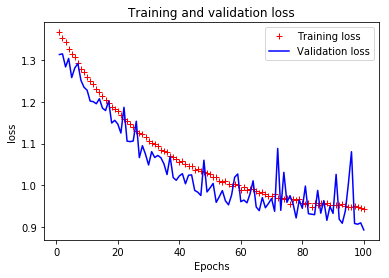

In [10]:
plot_train_val(history, "loss")

In [11]:
start = time.time()
score, acc = model.evaluate(x_test, y_test, batch_size=32)
print("Evaluation time: ", time.time() - start)
print("Score/accuracy: ", score, acc)

10000/10000 [==============================] - 1s 145us/step
Evaluation time:  1.4566154479980469
Score/accuracy:  0.9059611549377441 0.6914
